CSV1 is house dataset
CSV2 is disease 

## 1. Anomaly Detection (30 points)

**Part A (5 Points):**

By dividing a data set into quartiles, IQR is used to measure variability. The data is sorted ascending and divided into four equal parts. Q1, Q2, Q3, also known as the first, second, and third quartiles, are the values that separate the four equal parts.

Use the following data points to calculate outliers in the data
data = [11, 3, 8, 10, 12, 5, 1, 50]

Using a box plot, show the outliers in the box plot.

**Part B (5 points):**

Using the formula to calculate the Z-score detect outliers in the following data points.
data = [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3]
Using a box plot, show the outliers in the box plot.

**Part C (20 points):**

Use the dataset attached for identifying the outliers using Z-score.

Steps to follow in this question

- Step1(5 points): Show outliers using histograms and scatterplots for SalePrice

- Step2(7 points): Identify the outliers using Z-score for SalePrice column by using atleast 4 different thresholds.

- Step3(4 points): Print the number of outliers removed.

- Step4(4 points): Use LocalOutlierFactor as discussed in the class to plot the outliers from SalePrice and LotArea columns.

The outliers are: [50]


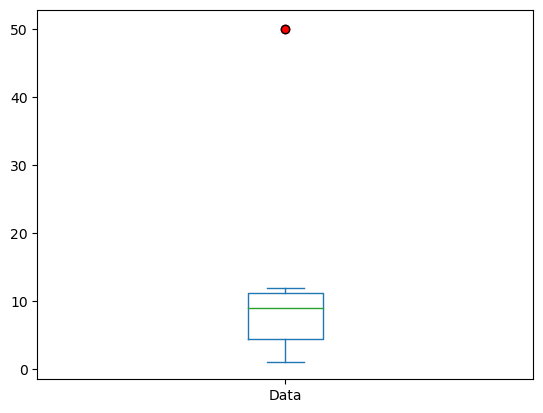

In [284]:
# Part A
# Using a box plot, show the outliers in the box plot.

# Import the following
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a class for IQR
class IQR():

    # Initiate attributes
    # Calculate quartiles (Q1, Q2, Q3)
    def __init__(self,data):
        self.data = data
        self.outliers = []
        self.Q1 = np.percentile(self.data, 25)
        self.Q2 = np.percentile(self.data, 50)
        self.Q3 = np.percentile(self.data, 75)
        self.iqr = self.Q3 - self.Q1

    # Create function to find outliers using
    # Q1 and Q3
    def find_outliers(self):
        lower_bound = self.Q1 - (1.5 * self.iqr)
        upper_bound = self.Q3 + (1.5 * self.iqr)

        outliers = []
        for i in range(len(self.data)):
            if self.data[i] >= upper_bound or self.data[i] <= lower_bound:
                outliers.append(self.data[i])
        self.outliers = outliers
        return outliers

    # Create boxplot using attributes within class
    # highlight outliers as red
    def create_boxplot(self):
        data_df = pd.DataFrame({'Data': self.data})
        data_df.plot(kind='box')
        plt.scatter(x=np.ones(len(self.outliers)), y=self.outliers, c='red', marker='o')
        plt.show()

# Run in main
def main():
    data = [11, 3, 8, 10, 12, 5, 1, 50]
    boxplot = IQR(data)
    outliers = boxplot.find_outliers()
    print("The outliers are:", outliers)
    boxplot.create_boxplot()

if __name__ == "__main__":
    main()


Here are the outliers:  [50]


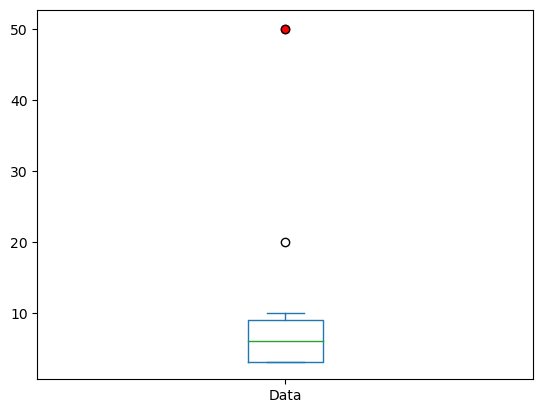

In [285]:
# Part B
# Using the formula to calculate the Z-score detect outliers in 
# the following data points.
# Using a box plot, show the outliers in the box plot.

# Create a class for Zscore detection
class Zscore:

    # Initiate data 
    def __init__(self, data):
        self.data = data
        self.mean = np.mean(self.data)
        self.standard_deviation = np.std(self.data)
        self.z_scores = (self.data-self.mean)/self.standard_deviation
        self.outliers = []

    # Create a fuction to find outliers
    def find_outliers(self, threshold):
        outliers = []
        for i, z in enumerate(self.z_scores):
            if abs(z) >= threshold:
                outliers.append(self.data[i])
        self.outliers = outliers
        return outliers
    
    # Create function to create boxplot
    # highlight outliers as red
    def create_boxplot(self):
        data_df = pd.DataFrame({'Data': self.data})
        data_df.plot(kind='box')
        plt.scatter(x=np.ones(len(self.outliers)), y=self.outliers, c='red', marker='o')
        plt.show()

# Run in main
def main():
    data = [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3]
    zscore = Zscore(data)
    outliers = zscore.find_outliers(3)
    print("Here are the outliers: ", outliers)
    zscore.create_boxplot()

if __name__ == "__main__":
    main()
    

Here are the outliers: [438780, 501837, 475000, 437154, 426000, 555000, 440000, 430000, 446261, 451950, 423000, 755000, 538000, 485000, 582933, 611657, 556581, 424870, 625000, 745000, 465000, 466500]


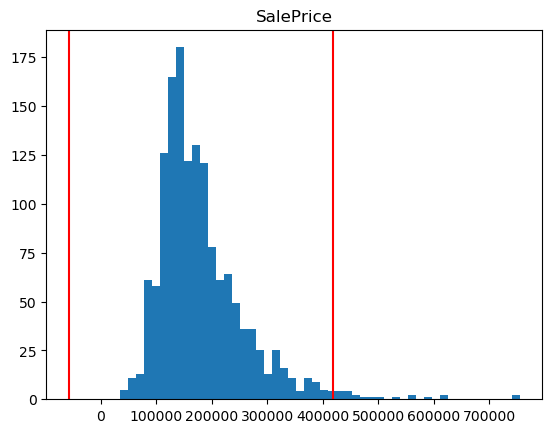

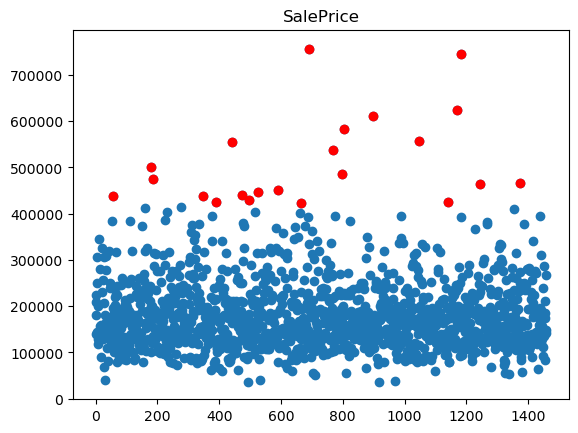

In [286]:
# Part C
# Use the dataset attached for identifying the outliers using Z-score.

# Step 1 (5 points): Show outliers using histograms and scatterplots

# Read Data and store SalePrice in variable
data = pd.read_csv("Q1_dataset.csv")
SalePrice = data["SalePrice"]

# Find outliers using z-score method
# Since we are looking at new data type
# create new function
def find_outliers(data,threshold):
    mean = np.mean(data)
    standard_deviation = np.std(data)
    z_scores = []
    for i in data:
        z_scores.append((i-mean)/standard_deviation)
    lower_bound = mean - (threshold * standard_deviation)
    upper_bound = mean + (threshold * standard_deviation)
    outliers_x = []
    outliers_y = []
    for i, z in enumerate(z_scores):
        if abs(z) >= threshold:
            outliers_x.append(i)
            outliers_y.append(data[i])
    return outliers_x, outliers_y, lower_bound, upper_bound

# Create histogram and scatter graphs
# Since we are looking at new data type
# create new function
# highlight lower and upper bound using red boundary
def create_graphs(variable,threshold):

    outliers_x, outliers_y, lower_bound, upper_bound = find_outliers(variable,threshold)
    
    plt.hist(variable, bins=50)
    plt.axvline(x=lower_bound,color='red',linestyle='-')
    plt.axvline(x=upper_bound,color='red',linestyle='-')
    plt.title(variable.name)
    plt.show()

    plt.scatter(range(len(variable)),variable)
    plt.scatter(outliers_x, outliers_y, color='red') 
    plt.title(variable.name)
    plt.show()

# Run in main
def main():
    outliers_x, outliers_y, lower_bound, upper_bound =find_outliers(SalePrice,3)
    print("Here are the outliers:", outliers_y)
    create_graphs(SalePrice,3)

if __name__ == "__main__":
    main()

Using threshold of: 1.5
Number of outliers: 130
Here are the outliers: [307000, 345000, 325300, 306000, 40000, 309000, 319900, 385000, 438780, 317000, 383970, 320000, 372402, 320000, 412500, 325624, 501837, 475000, 315000, 311872, 311500, 386250, 403000, 318000, 415298, 305900, 360000, 375000, 342643, 354000, 301000, 324000, 377426, 437154, 318061, 61000, 340000, 394432, 426000, 339750, 60000, 315000, 555000, 440000, 380000, 326000, 374000, 34900, 430000, 402861, 315750, 446261, 39300, 315000, 325000, 316600, 325000, 369900, 451950, 319000, 359100, 313000, 314813, 305000, 60000, 345000, 370878, 350000, 402000, 423000, 372500, 392000, 755000, 335000, 312500, 361919, 55000, 302000, 52000, 341000, 320000, 337000, 538000, 395000, 485000, 582933, 55993, 385000, 303477, 350000, 328900, 611657, 35311, 320000, 37900, 336000, 395192, 348000, 337500, 310000, 315500, 556581, 335000, 328000, 60000, 325000, 318000, 424870, 625000, 392500, 745000, 367294, 465000, 301500, 378500, 381000, 325000, 3350

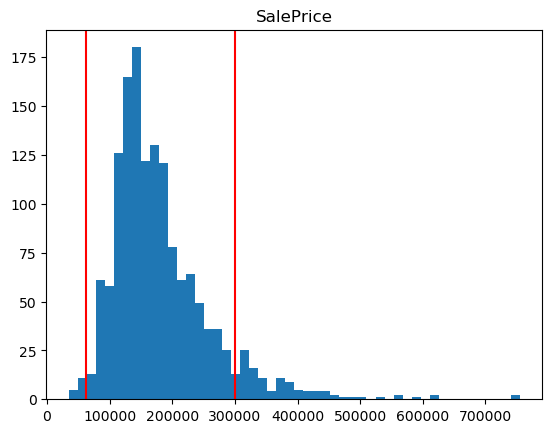

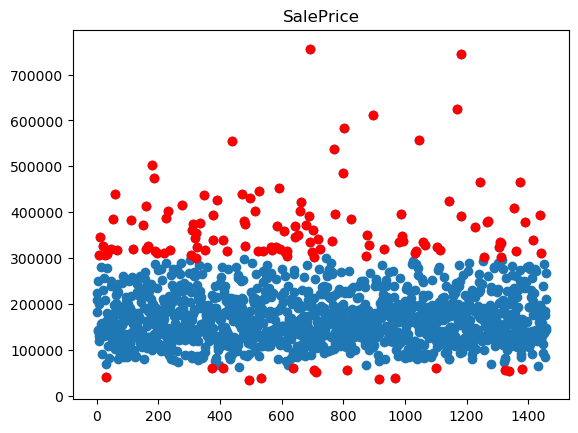

Using threshold of: 2
Number of outliers: 63
Here are the outliers: [345000, 385000, 438780, 383970, 372402, 412500, 501837, 475000, 386250, 403000, 415298, 360000, 375000, 342643, 354000, 377426, 437154, 340000, 394432, 426000, 555000, 440000, 380000, 374000, 430000, 402861, 446261, 369900, 451950, 359100, 345000, 370878, 350000, 402000, 423000, 372500, 392000, 755000, 361919, 341000, 538000, 395000, 485000, 582933, 385000, 350000, 611657, 395192, 348000, 556581, 424870, 625000, 392500, 745000, 367294, 465000, 378500, 381000, 410000, 466500, 377500, 340000, 394617]


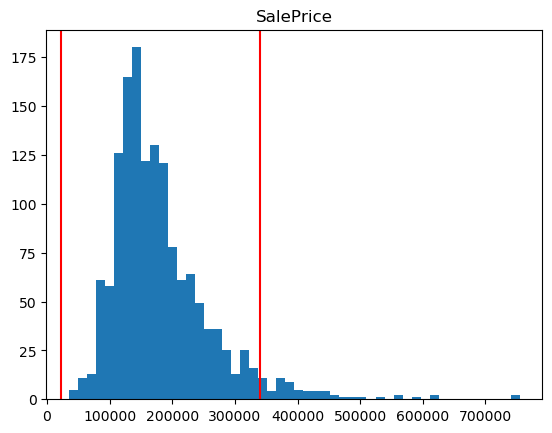

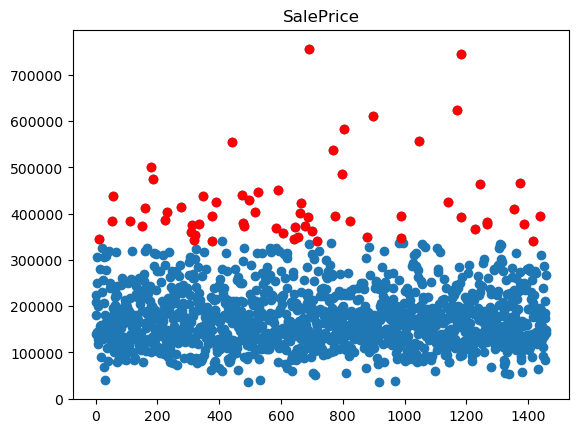

Using threshold of: 2.5
Number of outliers: 40
Here are the outliers: [385000, 438780, 383970, 412500, 501837, 475000, 386250, 403000, 415298, 437154, 394432, 426000, 555000, 440000, 380000, 430000, 402861, 446261, 451950, 402000, 423000, 392000, 755000, 538000, 395000, 485000, 582933, 385000, 611657, 395192, 556581, 424870, 625000, 392500, 745000, 465000, 381000, 410000, 466500, 394617]


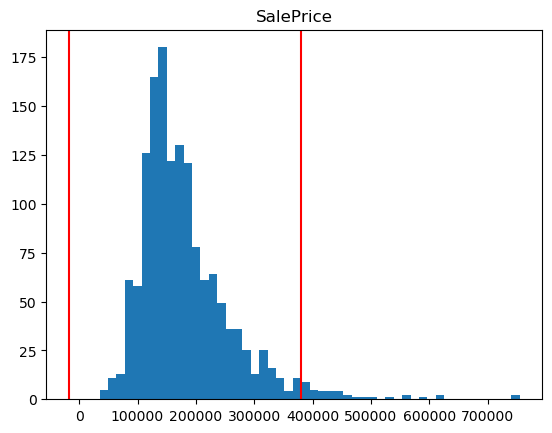

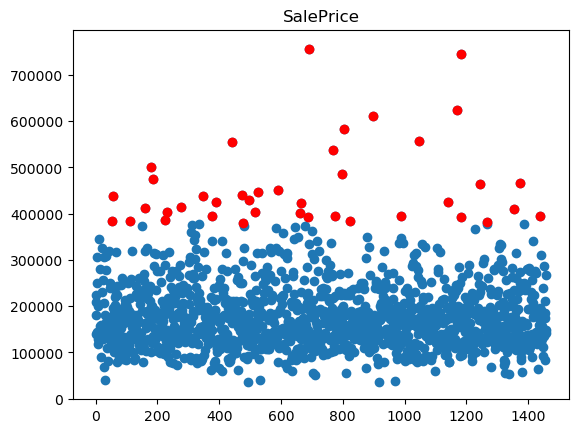

Using threshold of: 3
Number of outliers: 22
Here are the outliers: [438780, 501837, 475000, 437154, 426000, 555000, 440000, 430000, 446261, 451950, 423000, 755000, 538000, 485000, 582933, 611657, 556581, 424870, 625000, 745000, 465000, 466500]


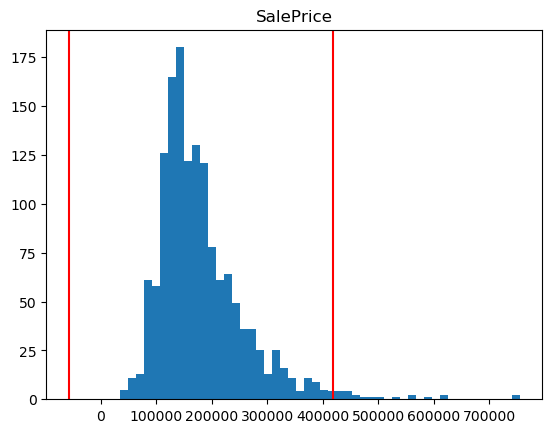

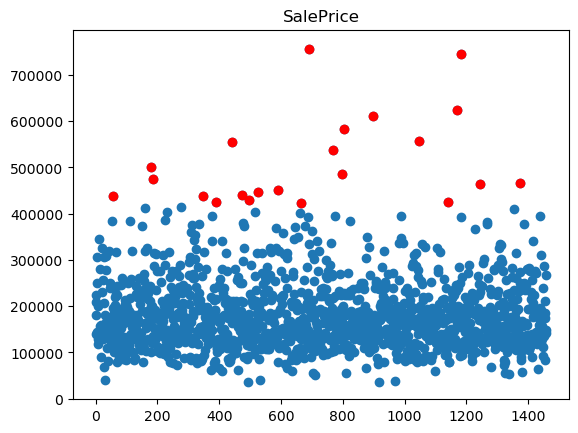

In [287]:
# Step 2 (7 points): Identify the outliers using Z-score for SalePrice column by using atleast 4 different thresholds.

# create a list of thresholds
thresholds = [1.5, 2, 2.5, 3]

# Iterate through thresholds and find_outliers
# create graphs with outliers
for i in thresholds:
    print("Using threshold of:", i)

    outliers_x, outliers_y, lower_bound, upper_bound = find_outliers(SalePrice,i)
    print("Number of outliers:", len(outliers_y))
    print("Here are the outliers:", outliers_y)

    create_graphs(SalePrice,i)




In [288]:
# Step3 (4 points): Print the number of outliers removed.

# Here we want to store the data of removed outliers
threshold_data = []

# Iterate through threshold 
# Clean data and count the length
# It should match the results from above
for i in thresholds:
    outliers_x, outliers_y, lower_bound, upper_bound = find_outliers(SalePrice,i)
    copydate = data.copy()
    original_length = len(data["SalePrice"])
    clean_data = data[~data["SalePrice"].isin(outliers_y)]
    end_length = len(clean_data)
    
    threshold_data.append(clean_data)
    print("Threshold:", i)
    print("Number of outliers removed:", original_length-end_length)





Threshold: 1.5
Number of outliers removed: 130
Threshold: 2
Number of outliers removed: 63
Threshold: 2.5
Number of outliers removed: 40
Threshold: 3
Number of outliers removed: 22


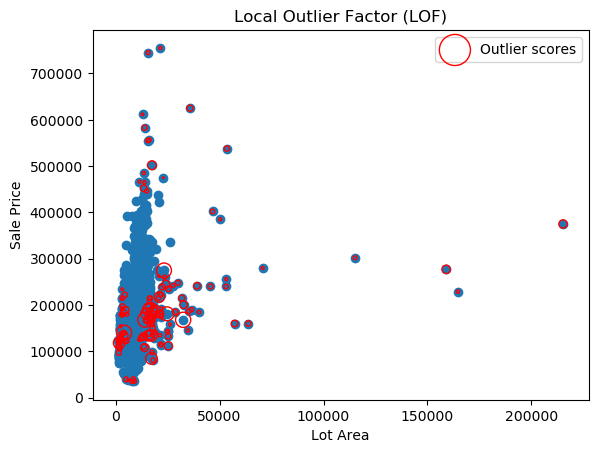

In [289]:
# Step4(4 points): Use LocalOutlierFactor as discussed in the class to plot the outliers from SalePrice and LotArea columns.

# Import LocalOutlierFactor
from sklearn.neighbors import LocalOutlierFactor

# Restore data to original value
data = pd.read_csv("Q1_dataset.csv")

# Create clf, create y_pred, find X_outliers
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(data[["LotArea","SalePrice"]])
X_outliers = data[y_pred == -1]

# Give each outlier a radius score
X_scores = clf.negative_outlier_factor_
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

# Title Graph
plt.title("Local Outlier Factor (LOF)")

# Scatter plot with data points
plt.scatter(data["LotArea"], data["SalePrice"])

# Assign radius to each outlier
plt.scatter(X_outliers["LotArea"], 
            X_outliers["SalePrice"], 
            color="r",
            facecolors="none", 
            s=1000 * radius, 
            label="Outlier scores")

# Label x and y axes
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")

# Put legen on upper right
legend = plt.legend(loc="upper right")

# show Plot
plt.show()


## 2. PCA (35 points)

Accuracy Comparison for Logistic Regression model: before and after PCA.
Please follow the following steps:

  1. Seperate and standardize the disease classification dataset. (5 points)
  2. Do Eigen decomposition using any LA library of your choice. Display scree plot. (10 points)
  3. Primary Component Selection. (Select the first 6 components) (5 points)
  4. Projection in a New Feature Space. (5 points)
  5. Principal Component Analysis. (5 points)
  6. Compare the presision and recall for the data using logistic regression before and after PCA. (10 points)

In [290]:
# 1. Seperate and standardize the disease classification dataset. (5 points)

# Import the following
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Read CSV and store as data
data = pd.read_csv("Q2_dataset.csv")

# Create x and y
X = data.iloc[:,:-1]
y = data['class']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

# Use standard Scaler for train and test set 
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [291]:
# Create pca_eigen for step 2
def pca_eigen(X):
	cov_matrix = np.cov(X)
	eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
	eigen_vectors = np.real(eigen_vectors)
	explained_variances = []
	for i in range(len(eigen_values)):
		explained_variances.append(eigen_values[i]/np.sum(eigen_values))
	return (eigen_values, eigen_vectors, explained_variances)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


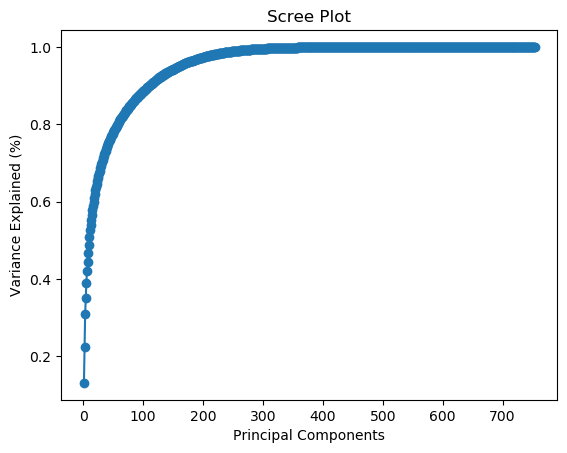

In [292]:
# 2. Do Eigen decomposition using any LA library of your choice. Display scree plot. (10 points)
import matplotlib.pyplot as plt

# Use pce_eigen to get values
eigen_values, eigen_vectors, explained_variances = pca_eigen(X=X_train_std.T)

# Plot Scree Plot
plt.plot(range(1, len(explained_variances) + 1), np.cumsum(explained_variances),marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained (%)')
plt.title('Scree Plot')
plt.show()

In [293]:
# 3. Primary Component Selection. (Select the first 6 components) (5 points)
components = eigen_vectors[:,:6]


In [294]:
# 4. Projection in a New Feature Space. (5 points)

# Use train and test with components
X_train_pca = X_train_std.dot(components)
X_test_pca = X_test_std.dot(components)


In [295]:
# 5. Principal Component Analysis. (5 points)
# Take a look at all 6 components
pca_df = pd.DataFrame(eigen_vectors.T[:, :6], columns=["v1", "v2", "v3", "v4", "v5", "v6"], index=X.columns)
print(pca_df)


                                 v1        v2        v3        v4        v5   
id                        -0.007869  0.044202 -0.018814  0.047084  0.057129  \
gender                    -0.004060 -0.045733 -0.014088 -0.003224 -0.002589   
PPE                        0.004725 -0.005822 -0.050236  0.004017  0.046408   
DFA                       -0.018574  0.029568  0.009915 -0.077987  0.014998   
RPDE                       0.012631 -0.005253  0.007222  0.051708  0.016346   
...                             ...       ...       ...       ...       ...   
tqwt_kurtosisValue_dec_32  0.000900 -0.009953  0.005662 -0.007087 -0.000557   
tqwt_kurtosisValue_dec_33  0.001751  0.000435 -0.002085  0.010454  0.001406   
tqwt_kurtosisValue_dec_34 -0.000698  0.001515 -0.002753  0.003400 -0.001855   
tqwt_kurtosisValue_dec_35 -0.001318 -0.002156 -0.002625  0.001507 -0.002958   
tqwt_kurtosisValue_dec_36 -0.001318 -0.002156 -0.002625  0.001507 -0.002958   

                                 v6  
id           

In [296]:
# 6. Compare the presision and recall for the data using logistic regression before and after PCA. (10 points)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

# Assuming you have already performed PCA and standardized the data as shown earlier

# Logistic Regression before PCA
# this will be called model1
# use X_train_std
model1 = LogisticRegression()
model1.fit(X_train_std, y_train)

# Create predictions
y_pred1 = model1.predict(X_test_std)

# Score precision and recall
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)

# Print results
print("Precision before PCA:", precision1)
print("Recall before PCA:", recall1)


Precision before PCA: 0.8938053097345132
Recall before PCA: 0.8706896551724138


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [297]:
# Logistic Regression after PCA
# this will be called model2
# use X_train_pca 
model2 = LogisticRegression()
model2.fit(X_train_pca, y_train)

# Create predictions
y_pred2 = model2.predict(X_test_pca)

# Score precision and recall
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)

# Print results
print("Precision after PCA:", precision2)
print("Recall after PCA:", recall2)

Precision after PCA: 0.8264462809917356
Recall after PCA: 0.8620689655172413


## 3. EM Algorithm (35 points)

Etimate the probability distribution in a 1-dimensional dataset
There are two Normal distributions  𝑁(𝜇1,𝜎1^2) and 𝑁(𝜇2,𝜎2^2).
There are 5 paramaters to estimate: 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) where 𝑤 is the probability that the data comes from the first normal probability distribution and (1-𝑤) comes from the second normal probability distribution.
The probability density function (PDF) of the mixture model is: 𝑓(𝑥|𝜃)=𝑤 𝑓1(𝑥 | 𝜇1,𝜎1^2)+(1−𝑤) 𝑓2(𝑥 | 𝜇2,𝜎2^2)
Your goal is to best fit a given probability density by finding 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) through EM iterations.

Using the following way to produce data:
```python


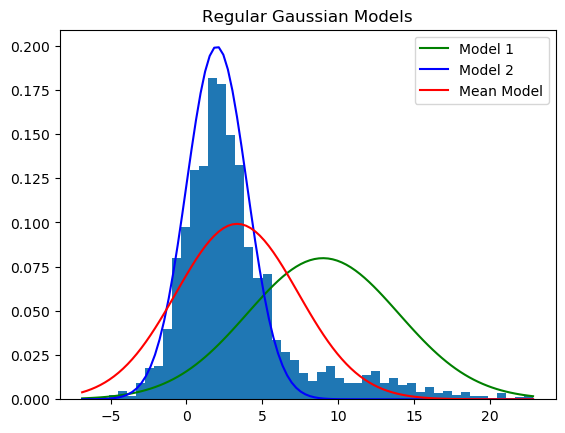

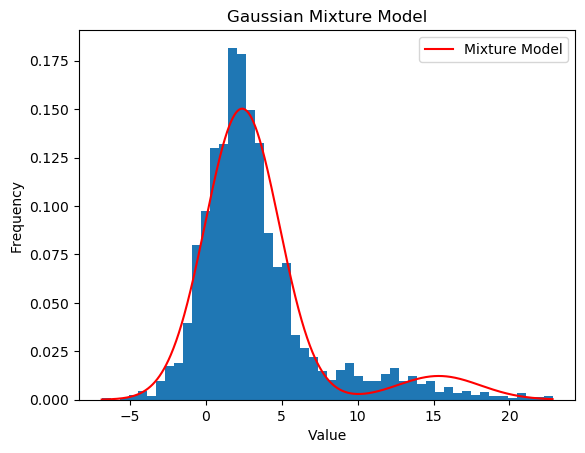

In [299]:
# Import the following
import numpy as np
from random import uniform

random_seed=36784765
np.random.seed(random_seed)

Mean1 = 9.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 5.0 #@param {type:"number"}
Mean2 = 2.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data=np.append(y1,y2)

'''
(1) Using a single Gaussion to estimate and draw a picure to see the result: (5 points)
'''

class Gaussian:
# Model univariate Gaussian
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma

    #probability density function
    def pdf(self, datum):
        #Probability of a data point given the current parameters

        # Calculate z score
        z = (datum - self.mu) / abs(self.sigma)

        # Use z score to calculate pdf
        return (1 / (np.sqrt(2 * np.pi) * abs(self.sigma))) * np.exp(-z*z/2)
    

'''
(2) Using a 2 Gaussian mixture model to estimate and draw a picture to see the result(Do not use sklearn GaussianMixture): (30 points)
'''

class GaussianMixture_self:
# Model mixture of two univariate Gaussians and their EM estimation

    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
        self.data = data
        self.mu_min = mu_min
        self.mu_max = mu_max
        self.sigma_min = sigma_min
        self.sigma_max = sigma_max
        self.mix = mix

        # Add two gaussian models and log likelihood
        self.gaussian_1 = Gaussian(uniform(mu_min, mu_max), uniform(sigma_min, sigma_max))
        self.gaussian_2 = Gaussian(uniform(mu_min, mu_max), uniform(sigma_min, sigma_max))
        self.log_likelihood = 0

    

    # Create E Step
    # Log likelihood is updated here
    def Estep(self):
        #Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage
        
        # Create two weight values
        weight_1_values = []
        weight_2_values = []
        
        # Iterate through data
        for i in self.data:
            
            # Calculate weight 1 and weight 2
            weight_1 = self.mix * self.gaussian_1.pdf(i)
            weight_2 = (1-self.mix) * self.gaussian_2.pdf(i)

            # Create percentage for both weight 1 and 2
            weight_1 = weight_1 / (weight_1 + weight_2) 
            weight_2 = weight_2 / (weight_1 + weight_2) 

            # Append values
            weight_1_values.append(weight_1)
            weight_2_values.append(weight_2)
            
            # update log likelihood
            self.log_likelihood = self.log_likelihood + np.log(weight_1 + weight_2)

        # Return weights 
        return np.array(weight_1_values), np.array(weight_2_values)


    # Create Mstep
    def Mstep(self, weight_1,weight_2):
        #Perform an M(aximization)-step

        # Get total weights
        total_weight_1 = np.sum(weight_1)
        total_weight_2 = np.sum(weight_2)

        # Update mu for both models
        self.gaussian_1.mu = np.sum(weight_1*self.data)/ total_weight_1
        self.gaussian_2.mu = np.sum(weight_2*self.data)/ total_weight_2
        
        # Update sigma for both models
        self.gaussian_1.sigma = np.sqrt(np.sum(weight_1 * ((self.data - self.gaussian_1.mu) ** 2)) / total_weight_1)
        self.gaussian_2.sigma = np.sqrt(np.sum(weight_2 * ((self.data - self.gaussian_2.mu) ** 2)) / total_weight_2)

        # Update mix
        self.mix = total_weight_1 / len(self.data)


    # Create Iterate to update model
    def iterate(self, N=1, verbose=False):
        #Perform N iterations, then compute log-likelihood
        # Log likelihood is updated in Estep
        # Mix is updated in Mstep
        for i in range(N):
            weight_1, weight_2 = self.Estep()
            self.Mstep(weight_1, weight_2)

            if verbose:
                print("Iteration:",i,"    Log-likelihood:",self.log_likelihood)


    def pdf(self,x):
        return (self.mix) * self.gaussian_1.pdf(x) + (1-self.mix) * self.gaussian_2.pdf(x)



# Run in main
def main():

    # Get real mu and sigma of entire data
    mu = np.mean(data)
    sigma = np.std(data)

    # Plot entire data
    plt.hist(data, bins=50, density=True)
    plt.title("Regular Gaussian Models")

    # Create first model
    first_model = Gaussian(Mean1,Standard_dev1)
    x = np.linspace(np.min(data), np.max(data), 100)
    y = first_model.pdf(x)
    plt.plot(x, y, color='green',label="Model 1")

    # Create second model
    second_model = Gaussian(Mean2,Standard_dev2)
    x = np.linspace(np.min(data), np.max(data), 100)
    y = second_model.pdf(x)
    plt.plot(x, y, color='blue', label="Model 2")

    # Create mean model
    mean_model = Gaussian(mu,sigma)
    x = np.linspace(np.min(data), np.max(data), 100)
    y = mean_model.pdf(x)
    plt.plot(x, y, color='red', label="Mean Model")
    legend = plt.legend(loc="upper right")
    plt.show()

    # Create mixture model
    mixture_model = GaussianMixture_self(data)
    mixture_model.iterate(N=100)
    x_mix = np.linspace(min(data), max(data), 1000)
    y_mix = []
    for i in x_mix:
        y_mix.append(mixture_model.pdf(i))

    # Plot mixture model
    plt.hist(data, bins=50, density=True)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.plot(x_mix, y_mix,color='red', label="Mixture Model")
    legend = plt.legend(loc="upper right")
    plt.title("Gaussian Mixture Model")
    plt.show()

# NOTE: Since data is not always consistent, mixture model may look
# like the mean model. Run it a couple of times and you will see a mixture
# of both gaussian curves 

if __name__ == "__main__":
    main()


Citations:
https://stackoverflow.com/questions/43269548/pandas-how-to-remove-rows-from-a-dataframe-based-on-a-list

https://relguzman.blogspot.com/2018/03/gaussian-mixture-models-explained.html


